In [21]:
%reload_ext autoreload
%autoreload 2 

In [6]:
import pandas as pd
from preprocessing.text_preprocessing import preprocess_data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
df = pd.read_csv('data/train.csv', encoding='ISO-8859-1')


In [8]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
print(df.shape)
print(df.info())
print(df.value_counts('sentiment'))


(27481, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None
sentiment
neutral     11118
positive     8582
negative     7781
dtype: int64


<AxesSubplot:xlabel='sentiment', ylabel='count'>

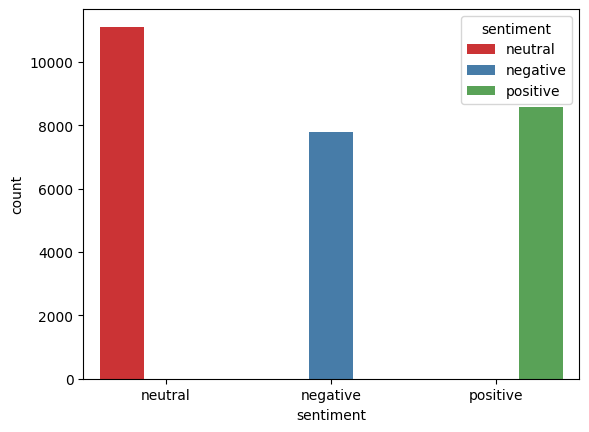

In [10]:
sns.countplot(data=df, x ='sentiment' , palette = "Set1" , hue ='sentiment')

## TEXT PREPROCESSING

In [11]:
columns_to_remove=['textID','Time of Tweet','selected_text', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
df_processed = preprocess_data(df, text_column_name='text',columns_to_remove=columns_to_remove)

In [12]:
df_processed

,text,sentiment
0,responded going,1
1,sooo sad miss san diego,0
2,bos bullying,0
3,interview leave alone,0
4,son put release already bought,0
...,...,...
27476,wish could come see u denver husband lost job ...,0
27477,wondered rake client made clear net force devs...,0
27478,yay good enjoy break probably need hectic week...,2
27479,worth,2


In [22]:
negative_text = ' '.join(df_processed[df_processed['sentiment'] == 0]['text'])
positive_text = ' '.join(df_processed[df_processed['sentiment'] == 2]['text'])
neutral_text = ' '.join(df_processed[df_processed['sentiment'] == 1]['text'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rakshitgupta/nltk_data...
[nltk_data]   Package wordnet is alrea

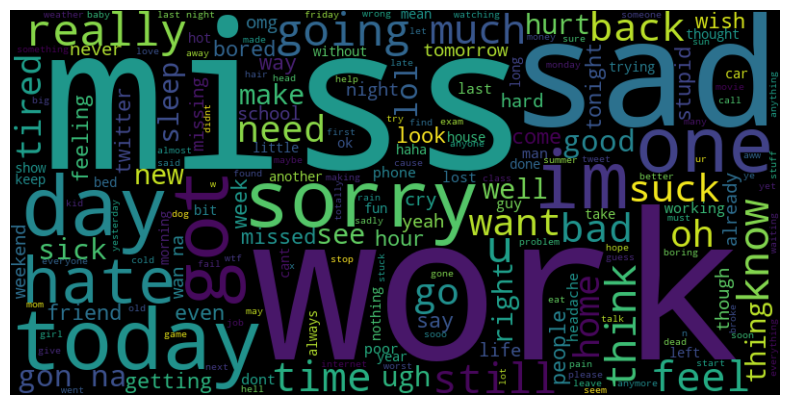

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

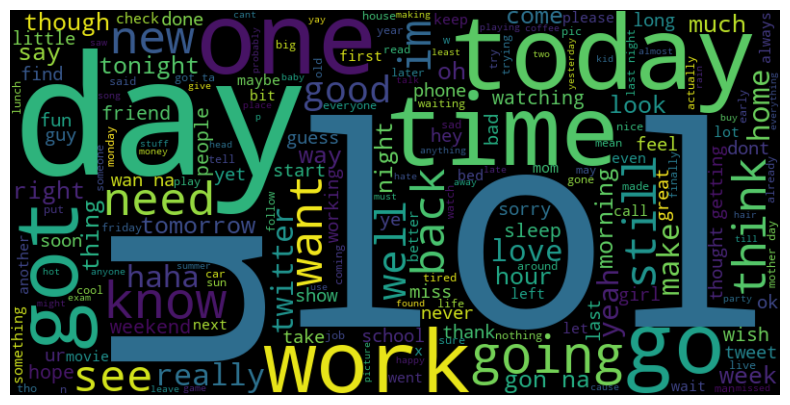

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

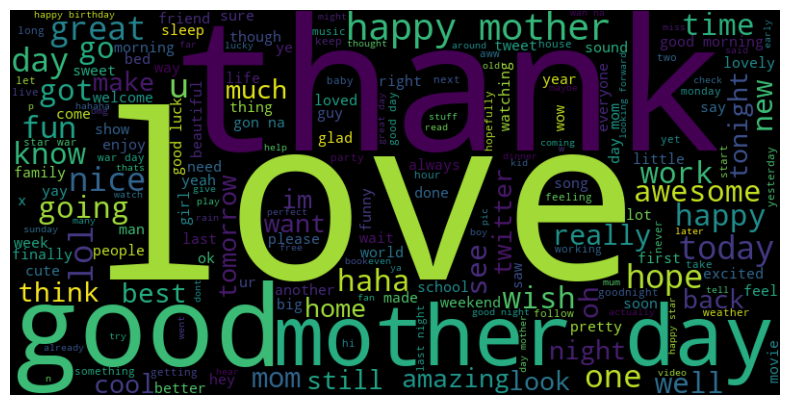

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

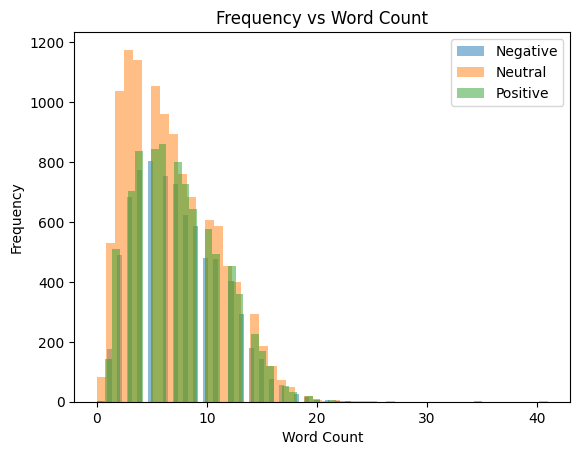

In [20]:
df_processed['word_count'] = df_processed['text'].apply(lambda rev:len(rev.split()))
df_processed[df_processed.sentiment==0]['word_count'].plot.hist(bins=50, alpha=0.5, label='Negative')
df_processed[df_processed.sentiment==1]['word_count'].plot.hist(bins=50, alpha=0.5,  label='Neutral')
df_processed[df_processed.sentiment==2]['word_count'].plot.hist(bins=50, alpha=0.5,  label='Positive')

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Frequency vs Word Count')
plt.legend()
plt.show()